In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
!head /content/sales_data.csv

head: cannot open '/content/sales_data.csv' for reading: No such file or directory


In [4]:
sales = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/sales_data.csv' ,
    parse_dates=['Date']
)

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [6]:
sales.shape

(113036, 18)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [8]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
sales.value_counts()

Date        Day  Month     Year  Customer_Age  Age_Group             Customer_Gender  Country        State             Product_Category  Sub_Category       Product                Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue
2014-03-17  17   March     2014  35            Adults (35-64)        M                Canada         British Columbia  Accessories       Bottles and Cages  Water Bottle - 30 oz.  15              2          5           44      30    74         3
2015-11-24  24   November  2015  41            Adults (35-64)        M                United States  California        Accessories       Tires and Tubes    Patch Kit/8 Patches    8               1          2           8       8     16         3
2016-03-29  29   March     2016  33            Young Adults (25-34)  F                Canada         British Columbia  Accessories       Tires and Tubes    Mountain Tire Tube     24              2          5           71      48    119        3
2015-11-19  19   November

In [10]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

# Relationship between columns

In [11]:
#correlation

corr= sales.corr()

In [12]:
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


# Column Wrangling

In [13]:
sales['notun column'] = sales['Profit']+sales['Cost']

In [14]:
sales['notun column'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: notun column, dtype: int64

In [15]:
sales['notun column'] != sales['Revenue'].sum()

0         True
1         True
2         True
3         True
4         True
          ... 
113031    True
113032    True
113033    True
113034    True
113035    True
Name: notun column, Length: 113036, dtype: bool

In [16]:
import sqlite3

In [17]:
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/sakila.db')

In [18]:
df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [19]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [20]:
df.shape

(16044, 10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [22]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


# Numerical Analysis

In [23]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [24]:
df.loc[(df['film_rating']=='PG') | (df['film_rating']=='PG-13')].shape

(6797, 10)

In [25]:
n=3

In [26]:
n

3

In [27]:
2**3

8

In [28]:
2*3

6

In [29]:
np.int8

numpy.int8

In [30]:
np.int16

numpy.int16

In [31]:
np.int32

numpy.int32

## Numpy

In [32]:
import sys

**arrays**

In [33]:
a=np.array([1,2,3,4])

In [34]:
a

array([1, 2, 3, 4])

In [35]:
a[0:]

array([1, 2, 3, 4])

In [36]:
a[::-1]

array([4, 3, 2, 1])

In [37]:
a[::-2]

array([4, 2])

In [38]:
a[::2]

array([1, 3])

In [39]:
#indexing
a[0], a[1], a[2] 

(1, 2, 3)

In [40]:
a[[1,3]]

array([2, 4])

In [41]:
#changing array data type
d=np.array([2,5,6,7,8], dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [42]:
d

array([2., 5., 6., 7., 8.])

In [43]:
#storing string
c=np.array(['a','b','c'])

In [44]:
c.dtype

dtype('<U1')

In [45]:
d.dtype

dtype('float64')

**dimensions of array**

In [46]:
A=np.array([
            [1,2,3],
            [4,5,6]

]
    
)

In [47]:
a.dtype

dtype('int64')

In [48]:
A.dtype

dtype('int64')

In [49]:
A.shape

(2, 3)

In [50]:
A.ndim

2

In [51]:
B=np.array(
    [
     [
     [1,2,3],
     [9,33,44]
    ],
[
[12,32,67],
[23,12,45]


    ]

    ]

)

In [52]:
B.size

12

In [53]:
B.shape

(2, 2, 3)

In [54]:
B.ndim

3

# **Matrix**

In [55]:
#indexing and slicing of matrix

In [56]:
#square matrix
A=np.array([
            [1,2,3],#0
            [4,5,6],#1
            [7,8,9]#2
])


In [57]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [58]:
#indexing a matrix done by A[row][column] / A[row,column] / A[row]

A[1]

array([4, 5, 6])

In [59]:
A[0][2]

3

In [60]:
A[0,2] 

3

In [61]:
A[0:2] #rows display korbe until 2 , 2 dekhabe na

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
A[:,:2] # selecting every row but column until 2 mane 0,1 column dekhabe 2 na

array([[1, 2],
       [4, 5],
       [7, 8]])

In [63]:
#assigning values
A[1] = np.array([10,10,10])

In [64]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [ 7,  8,  9]])

In [65]:
A[2]=99 #assigning same value to a whole row

In [66]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [99, 99, 99]])

**Summary Statistics**

In [67]:
r=np.array([2,3,4,5])

In [68]:
r.sum()

14

In [69]:
r.mean()

3.5

In [70]:
r.std()
#The standard deviation is a statistic that measures the dispersion 
#of a dataset relative to its mean and is 
#calculated as the square root of the variance.
#The standard deviation is calculated 
#as the square root of variance by determining 
#each data point's deviation relative to the mean.

1.118033988749895

In [71]:
r.var()

1.25

In [72]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [99, 99, 99]])

In [73]:
A.sum(axis=0) # axis 0 mane columnwise addition

array([110, 111, 112])

In [74]:
A.sum(axis=1) #axis 1 mane rowwise addition 

array([  6,  30, 297])

Axis 0 mane columnwise 
Axis 1 mane rowwise

**Broadcasting and Vectorizing Operations**

In [75]:
w=np.array([23,32,43,34])

In [76]:
w+10

array([33, 42, 53, 44])

In [77]:
w

array([23, 32, 43, 34])

In [78]:
w*2

array([46, 64, 86, 68])

In [79]:
w

array([23, 32, 43, 34])

In [80]:
w +=100 #equals er jonno assign hoye jacche

In [81]:
w

array([123, 132, 143, 134])

In [82]:
o=[45,54,23,32]

In [83]:
[i*10 for i in o]

[450, 540, 230, 320]

In [84]:
o

[45, 54, 23, 32]

**Boolean Arrays**

In [85]:
w

array([123, 132, 143, 134])

In [86]:
w=np.arange(4)

In [87]:
w

array([0, 1, 2, 3])

In [88]:
w[[True,False,False,True]]

array([0, 3])

In [89]:
w >=2 #comparison e true false e outcome ashe

array([False, False,  True,  True])

In [90]:
w

array([0, 1, 2, 3])

In [91]:
w[w >=2] #here we are asking values using comparison as a predicate

array([2, 3])

**Linear Algebra**

In [92]:
v=np.array([
            
            [1,2,3],
            [8,9,5],
            [33,54,11]
])

In [93]:
v.ndim

2

In [94]:
g=np.array([
            
            [1,2,3,4],
            [8,9,5,7],
            [10,11,12,13]
])

In [95]:
g.ndim

2

In [96]:
v.dot(g) #dot product for both being 1D its inner product of vectors
#for 2d its matrix multiplication 

array([[ 47,  53,  49,  57],
       [130, 152, 129, 160],
       [575, 673, 501, 653]])

**Lists**

In [97]:
mylist=["ap","ba","ca"]

In [98]:
mylist

['ap', 'ba', 'ca']

In [99]:
len(mylist)

3

In [100]:
type(mylist) #checking type of a variable using type() function

list

In [101]:
l=list(range(1000))

In [102]:
u=np.arange(1000)

In [103]:
%time h= np.sum(u**2)

CPU times: user 80 µs, sys: 11 µs, total: 91 µs
Wall time: 98 µs


In [104]:
h

332833500

In [105]:
%time m= sum([x**2 for x in l])

CPU times: user 500 µs, sys: 0 ns, total: 500 µs
Wall time: 512 µs


In [106]:
m

332833500

so use of numpy makes every computation faster

# Pandas

**Pandas Series**

In [107]:
pop=pd.Series([34,34,22,12,45,67])

In [108]:
pop

0    34
1    34
2    22
3    12
4    45
5    67
dtype: int64

In [109]:
type(pop)

pandas.core.series.Series

In [110]:
type(pop.values)

numpy.ndarray

In [111]:
pop.name="Shaqran"

In [112]:
pop

0    34
1    34
2    22
3    12
4    45
5    67
Name: Shaqran, dtype: int64

In [113]:
 pop[0]

34

In [114]:
pop[1]

34

In [115]:
pop.index

RangeIndex(start=0, stop=6, step=1)

In [116]:
# here in Series we can rename the index

pop.index = [ "Canada", "USA", "BAng", "IND", "MAL", "ESP"]

In [117]:
pop

Canada    34
USA       34
BAng      22
IND       12
MAL       45
ESP       67
Name: Shaqran, dtype: int64

In [118]:
#now instead of index number we can call the integers by their country

pop["Canada"]

34

In [119]:
pop= pd.Series(
    [34,34,22,12,45,67] ,
    index=["Canada","USA", "BAN", "IND", "MAL","ESP"] ,
    name="SHAQ"


)

In [120]:
pop

Canada    34
USA       34
BAN       22
IND       12
MAL       45
ESP       67
Name: SHAQ, dtype: int64

In [121]:
pop.iloc[0]

34

In [122]:
pop.iloc[-1]

67

In [123]:
pop[0]

34

In [124]:
pop[[0,1]]

Canada    34
USA       34
Name: SHAQ, dtype: int64

In [125]:
pop[["Canada","USA"]]

Canada    34
USA       34
Name: SHAQ, dtype: int64

In [126]:
pop[:2]

Canada    34
USA       34
Name: SHAQ, dtype: int64

In [127]:
pop["MAL":"ESP"]

MAL    45
ESP    67
Name: SHAQ, dtype: int64

conditionals in pandas

In [128]:
pop

Canada    34
USA       34
BAN       22
IND       12
MAL       45
ESP       67
Name: SHAQ, dtype: int64

In [129]:
pop>30

Canada     True
USA        True
BAN       False
IND       False
MAL        True
ESP        True
Name: SHAQ, dtype: bool

In [130]:
pop[pop>30]

Canada    34
USA       34
MAL       45
ESP       67
Name: SHAQ, dtype: int64

In [131]:
pop.mean()

35.666666666666664

In [132]:
pop>pop.mean()

Canada    False
USA       False
BAN       False
IND       False
MAL        True
ESP        True
Name: SHAQ, dtype: bool

In [133]:
pop[pop>pop.mean()]

MAL    45
ESP    67
Name: SHAQ, dtype: int64

In [134]:
pop.std()

19.08577131442863

In [135]:
pop>pop.mean() - pop.std() /2

Canada     True
USA        True
BAN       False
IND       False
MAL        True
ESP        True
Name: SHAQ, dtype: bool

In [136]:
pop>pop.mean() + pop.std() /2

Canada    False
USA       False
BAN       False
IND       False
MAL       False
ESP        True
Name: SHAQ, dtype: bool

In [137]:
#so
(pop>pop.mean() - pop.std() /2) | (pop>pop.mean() + pop.std() /2)

Canada     True
USA        True
BAN       False
IND       False
MAL        True
ESP        True
Name: SHAQ, dtype: bool

In [138]:
pop[(pop>pop.mean() - pop.std() /2) | (pop>pop.mean() + pop.std() /2)]

Canada    34
USA       34
MAL       45
ESP       67
Name: SHAQ, dtype: int64

In [139]:
pop

Canada    34
USA       34
BAN       22
IND       12
MAL       45
ESP       67
Name: SHAQ, dtype: int64

In [140]:
pop.iloc[0] = 35

In [141]:
pop

Canada    35
USA       34
BAN       22
IND       12
MAL       45
ESP       67
Name: SHAQ, dtype: int64

In [142]:
pop.iloc[-1]= 70

In [143]:
pop

Canada    35
USA       34
BAN       22
IND       12
MAL       45
ESP       70
Name: SHAQ, dtype: int64

In [144]:
pop>30

Canada     True
USA        True
BAN       False
IND       False
MAL        True
ESP        True
Name: SHAQ, dtype: bool

In [145]:
pop[pop>30] = 42

In [146]:
pop

Canada    42
USA       42
BAN       22
IND       12
MAL       42
ESP       42
Name: SHAQ, dtype: int64

**Pandas Dataframe**

In [147]:
df= pd.DataFrame( 
{
"Population" : [35,43,25,56,78] ,
"GDP"        : [1233,23532,675322,2345,11345] ,
"Surface Area" : [333,234,134,865,456] ,
"HDI"         : [0.833,0.3355, 0.887,0.911, 0.711] ,
"Continent"   : ["Europe" , "Asia" , 'Antartica','Australia','America'] ,
} ,
    
columns =['Population', 'GDP' ,'Surface Area', 'Continent' , 'HDI']




)

#columns er naming kontar por konta korar moddho diye amra columns gula 
#arrange kori dataframe e

In [148]:
df

,Population,GDP,Surface Area,Continent,HDI
0,35,1233,333,Europe,0.8330
1,43,23532,234,Asia,0.3355
2,25,675322,134,Antartica,0.8870
3,56,2345,865,Australia,0.9110
4,78,11345,456,America,0.7110


In [149]:
df.index=['Canada','USA','Ban','ESP','MAL']

In [150]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
Ban,25,675322,134,Antartica,0.8870
ESP,56,2345,865,Australia,0.9110
MAL,78,11345,456,America,0.7110


In [151]:
#info gives a quick structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Canada to MAL
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    5 non-null      int64  
 1   GDP           5 non-null      int64  
 2   Surface Area  5 non-null      int64  
 3   Continent     5 non-null      object 
 4   HDI           5 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 240.0+ bytes


In [152]:
#size of the df
df.size

25

In [153]:
#shape of the df
df.shape

(5, 5)

In [154]:
df.describe()

,Population,GDP,Surface Area,HDI
count,5.000000,5.00000,5.000000,5.000000
mean,47.400000,142755.40000,404.400000,0.735500
std,20.525594,297848.01741,283.753943,0.236569
min,25.000000,1233.00000,134.000000,0.335500
25%,35.000000,2345.00000,234.000000,0.711000
50%,43.000000,11345.00000,333.000000,0.833000
75%,56.000000,23532.00000,456.000000,0.887000
max,78.000000,675322.00000,865.000000,0.911000


In [155]:
df.dtypes

Population        int64
GDP               int64
Surface Area      int64
Continent        object
HDI             float64
dtype: object

In [156]:
df.dtypes.value_counts()

int64      3
object     1
float64    1
dtype: int64

indexing , Selecting and Slicing in pandas Dataframe

In [157]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
Ban,25,675322,134,Antartica,0.8870
ESP,56,2345,865,Australia,0.9110
MAL,78,11345,456,America,0.7110


In [158]:
#loc will let you select individual rows

df.loc['Canada']

Population          35
GDP               1233
Surface Area       333
Continent       Europe
HDI              0.833
Name: Canada, dtype: object

In [159]:
#iloc will let you selct the row by their sequential position
df.iloc[-1]

Population           78
GDP               11345
Surface Area        456
Continent       America
HDI               0.711
Name: MAL, dtype: object

In [160]:
#and with just [] like df["column_name"]
#we will get the values of the entire column

df['Population']

Canada    35
USA       43
Ban       25
ESP       56
MAL       78
Name: Population, dtype: int64

In [161]:
#all the results that are returned are in Series

In [162]:
#slicing

In [163]:
df.loc['Canada':'USA', 'Population' ]

Canada    35
USA       43
Name: Population, dtype: int64

In [164]:
df.loc['Canada':'USA', ['Population','GDP' ]]

,Population,GDP
Canada,35,1233
USA,43,23532


In [165]:
df.loc['Canada':'USA', ['Population','GDP' ]]

,Population,GDP
Canada,35,1233
USA,43,23532


In [166]:
df.iloc[[0,1,-1]]

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
MAL,78,11345,456,America,0.7110


In [167]:
df.iloc[1:3]

,Population,GDP,Surface Area,Continent,HDI
USA,43,23532,234,Asia,0.3355
Ban,25,675322,134,Antartica,0.8870


In [168]:
df.iloc[1:3, [0,3]] 

,Population,Continent
USA,43,Asia
Ban,25,Antartica


In [169]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
USA,23532,234
Ban,675322,134


**Conditionals in DF**

In [170]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
Ban,25,675322,134,Antartica,0.8870
ESP,56,2345,865,Australia,0.9110
MAL,78,11345,456,America,0.7110


In [171]:
df.index=['Canada','USA','AFG','PAK','BAN']

In [172]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
AFG,25,675322,134,Antartica,0.8870
PAK,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


In [173]:
df['Population'] >30

Canada     True
USA        True
AFG       False
PAK        True
BAN        True
Name: Population, dtype: bool

In [174]:
df.loc[df['Population'] >30] #shows the df with pop>30

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
PAK,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


In [175]:
df.loc[df['Population'] >30 , 'Population']

Canada    35
USA       43
PAK       56
BAN       78
Name: Population, dtype: int64

In [176]:
df.loc[df['Population'] >30 , ['Population','GDP']]

,Population,GDP
Canada,35,1233
USA,43,23532
PAK,56,2345
BAN,78,11345


**Dropping in Dataframes**

In [177]:
df.drop('Canada')

,Population,GDP,Surface Area,Continent,HDI
USA,43,23532,234,Asia,0.3355
AFG,25,675322,134,Antartica,0.8870
PAK,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


In [178]:
df.drop(["USA","PAK"])

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.833
AFG,25,675322,134,Antartica,0.887
BAN,78,11345,456,America,0.711


In [179]:
df.drop(columns=['Population','GDP'])

,Surface Area,Continent,HDI
Canada,333,Europe,0.8330
USA,234,Asia,0.3355
AFG,134,Antartica,0.8870
PAK,865,Australia,0.9110
BAN,456,America,0.7110


**Operations in Dataframe**

In [180]:
df= pd.DataFrame( 
{
"Population" : [35,43,25,56,78] ,
"GDP"        : [1233,23532,675322,2345,11345] ,
"Surface Area" : [333,234,134,865,456] ,
"HDI"         : [0.833,0.3355, 0.887,0.911, 0.711] ,
"Continent"   : ["Europe" , "Asia" , 'Antartica','Australia','America'] ,
} ,
    
columns =['Population', 'GDP' ,'Surface Area', 'Continent' , 'HDI']   ,

index=["Canada","USA","PAK","AFG","BAN"]


)


In [181]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
PAK,25,675322,134,Antartica,0.8870
AFG,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


In [182]:
df[['Population','GDP']]

,Population,GDP
Canada,35,1233
USA,43,23532
PAK,25,675322
AFG,56,2345
BAN,78,11345


In [183]:
df[['Population','GDP']] *10

,Population,GDP
Canada,350,12330
USA,430,235320
PAK,250,6753220
AFG,560,23450
BAN,780,113450


In [184]:
#Operations with Series work at a column level, broadcasting down the rows 

In [185]:
crisis = pd.Series([-1_000_000, -0.3], index=['GDP','HDI'] )

In [186]:
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [187]:
df[['GDP','HDI']] #columns display er time e 2ta [] dite hoy

,GDP,HDI
Canada,1233,0.8330
USA,23532,0.3355
PAK,675322,0.8870
AFG,2345,0.9110
BAN,11345,0.7110


In [188]:
df[['GDP','HDI']] + crisis

,GDP,HDI
Canada,-998767.0,0.5330
USA,-976468.0,0.0355
PAK,-324678.0,0.5870
AFG,-997655.0,0.6110
BAN,-988655.0,0.4110


dataframes are immutable. drop doesnt actually drop values

**Modifying DataFrames**

In [189]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
PAK,25,675322,134,Antartica,0.8870
AFG,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


In [190]:
df.drop("Canada")

,Population,GDP,Surface Area,Continent,HDI
USA,43,23532,234,Asia,0.3355
PAK,25,675322,134,Antartica,0.8870
AFG,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


In [191]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
PAK,25,675322,134,Antartica,0.8870
AFG,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


Add columns or, replace values for columns without issues

In [192]:
lang= pd.Series(['Bangla' , 'Persian', 'English'],
                index=['BAN','AFG','Canada'],
                name='Languages')

In [193]:
lang

BAN        Bangla
AFG       Persian
Canada    English
Name: Languages, dtype: object

lang has 3 index but df e kintu aro ase. But pandas match koira index onujai boshay dey

In [194]:
df

,Population,GDP,Surface Area,Continent,HDI
Canada,35,1233,333,Europe,0.8330
USA,43,23532,234,Asia,0.3355
PAK,25,675322,134,Antartica,0.8870
AFG,56,2345,865,Australia,0.9110
BAN,78,11345,456,America,0.7110


In [195]:
df['Languages'] =lang

In [196]:
df

,Population,GDP,Surface Area,Continent,HDI,Languages
Canada,35,1233,333,Europe,0.8330,English
USA,43,23532,234,Asia,0.3355,NaN
PAK,25,675322,134,Antartica,0.8870,NaN
AFG,56,2345,865,Australia,0.9110,Persian
BAN,78,11345,456,America,0.7110,Bangla


Replacing values per column

In [197]:
df['Languages'] = "Bangla"

In [198]:
df

,Population,GDP,Surface Area,Continent,HDI,Languages
Canada,35,1233,333,Europe,0.8330,Bangla
USA,43,23532,234,Asia,0.3355,Bangla
PAK,25,675322,134,Antartica,0.8870,Bangla
AFG,56,2345,865,Australia,0.9110,Bangla
BAN,78,11345,456,America,0.7110,Bangla


Renaming Columns

In [199]:
df.rename(    #column ar row =sign dewar por {}bracket
    columns={
        'Population' : 'PoP' # =sign hoy na :sign hoy
    }, index={
        'PAK' :'PAKI'
    }
)

,PoP,GDP,Surface Area,Continent,HDI,Languages
Canada,35,1233,333,Europe,0.8330,Bangla
USA,43,23532,234,Asia,0.3355,Bangla
PAKI,25,675322,134,Antartica,0.8870,Bangla
AFG,56,2345,865,Australia,0.9110,Bangla
BAN,78,11345,456,America,0.7110,Bangla


In [200]:
df

,Population,GDP,Surface Area,Continent,HDI,Languages
Canada,35,1233,333,Europe,0.8330,Bangla
USA,43,23532,234,Asia,0.3355,Bangla
PAK,25,675322,134,Antartica,0.8870,Bangla
AFG,56,2345,865,Australia,0.9110,Bangla
BAN,78,11345,456,America,0.7110,Bangla


creating columns with other columns

In [201]:
df['GDP'] / df['Population']

Canada       35.228571
USA         547.255814
PAK       27012.880000
AFG          41.875000
BAN         145.448718
dtype: float64

In [202]:
df['GDP Per Capita'] = df['GDP'] / df['Population']

In [203]:
df

,Population,GDP,Surface Area,Continent,HDI,Languages,GDP Per Capita
Canada,35,1233,333,Europe,0.8330,Bangla,35.228571
USA,43,23532,234,Asia,0.3355,Bangla,547.255814
PAK,25,675322,134,Antartica,0.8870,Bangla,27012.880000
AFG,56,2345,865,Australia,0.9110,Bangla,41.875000
BAN,78,11345,456,America,0.7110,Bangla,145.448718


# Reading External Data & Plotting

In [204]:
pd.read_csv?

In [205]:
ff = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/btc-market-price-full.csv', header=None)

read_csv e csv file er first row shobshomoy column name dhora hoy

In [206]:
ff

,0,1
0,2009-01-03 00:00:00,0.000000
1,2009-01-05 00:00:00,0.000000
2,2009-01-07 00:00:00,0.000000
3,2009-01-09 00:00:00,0.000000
4,2009-01-11 00:00:00,0.000000
...,...,...
1683,2018-03-23 00:00:00,8686.826667
1684,2018-03-25 00:00:00,8617.296667
1685,2018-03-27 00:00:00,7876.195000
1686,2018-03-29 00:00:00,7172.280000


In [207]:
 ff.head(3)

,0,1
0,2009-01-03 00:00:00,0.0
1,2009-01-05 00:00:00,0.0
2,2009-01-07 00:00:00,0.0


In [208]:
ff.columns=['Timestamp', 'Price']

In [209]:
ff

,Timestamp,Price
0,2009-01-03 00:00:00,0.000000
1,2009-01-05 00:00:00,0.000000
2,2009-01-07 00:00:00,0.000000
3,2009-01-09 00:00:00,0.000000
4,2009-01-11 00:00:00,0.000000
...,...,...
1683,2018-03-23 00:00:00,8686.826667
1684,2018-03-25 00:00:00,8617.296667
1685,2018-03-27 00:00:00,7876.195000
1686,2018-03-29 00:00:00,7172.280000


In [210]:
ff.dtypes

Timestamp     object
Price        float64
dtype: object

here we see Timestamp er value object hishab e ase. so we convert that to TimeDate

In [211]:
ff['Timestamp']=pd.to_datetime(ff['Timestamp'])

In [212]:
ff

,Timestamp,Price
0,2009-01-03,0.000000
1,2009-01-05,0.000000
2,2009-01-07,0.000000
3,2009-01-09,0.000000
4,2009-01-11,0.000000
...,...,...
1683,2018-03-23,8686.826667
1684,2018-03-25,8617.296667
1685,2018-03-27,7876.195000
1686,2018-03-29,7172.280000


we now set the timestamp as the index of the dataframe

In [213]:
ff.set_index('Timestamp', inplace=True)

In [214]:
ff

,Price
Timestamp,
2009-01-03,0.000000
2009-01-05,0.000000
2009-01-07,0.000000
2009-01-09,0.000000
2009-01-11,0.000000
...,...
2018-03-23,8686.826667
2018-03-25,8617.296667
2018-03-27,7876.195000


In [215]:
ff.loc['2009-01-03']

Price    0.0
Name: 2009-01-03 00:00:00, dtype: float64

**PLOT Data**

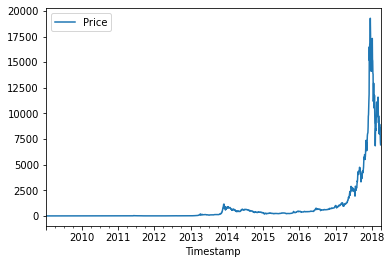

In [216]:
ff.plot()

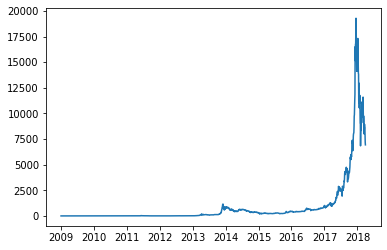

In [217]:
plt.plot(ff.index, ff['Price'])

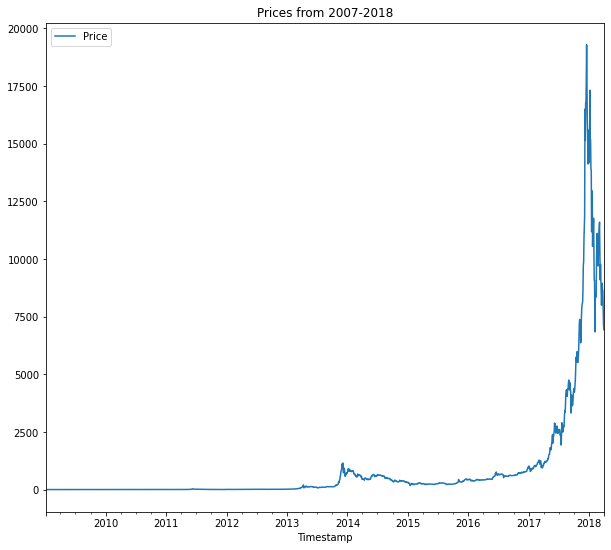

In [218]:
ff.plot(figsize=(10,9) , title="Prices from 2007-2018")

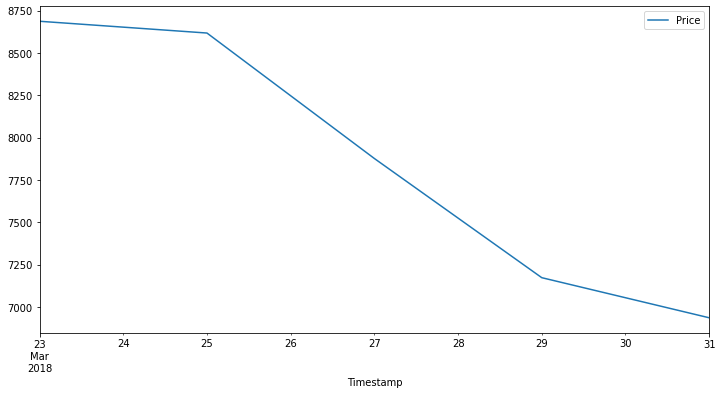

In [219]:
ff.loc['2018-03-23' : '2018-03-31'].plot(figsize=(12,6))

# Data Cleaning

In [220]:
ff

,Price
Timestamp,
2009-01-03,0.000000
2009-01-05,0.000000
2009-01-07,0.000000
2009-01-09,0.000000
2009-01-11,0.000000
...,...
2018-03-23,8686.826667
2018-03-25,8617.296667
2018-03-27,7876.195000


In [221]:
pd.isnull(ff)

,Price
Timestamp,
2009-01-03,False
2009-01-05,False
2009-01-07,False
2009-01-09,False
2009-01-11,False
...,...
2018-03-23,False
2018-03-25,False
2018-03-27,False


In [222]:
pd.notnull(ff)

,Price
Timestamp,
2009-01-03,True
2009-01-05,True
2009-01-07,True
2009-01-09,True
2009-01-11,True
...,...
2018-03-23,True
2018-03-25,True
2018-03-27,True


In [223]:
pd.isnull(pd.Series([1,np.nan ,7]))

0    False
1     True
2    False
dtype: bool

In [224]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [225]:
gg= pd.DataFrame(
    {
        'COD' : ['Dr. dis', 'cloakzy', 'timmy', 'nick'],
        'Valo' : ['Dr. dis' , 'Rafi', 'S1mple', np.nan]
    }
)

In [226]:
gg

,COD,Valo
0,Dr. dis,Dr. dis
1,cloakzy,Rafi
2,timmy,S1mple
3,nick,NaN


In [227]:
pd.isnull(gg)

,COD,Valo
0,False,False
1,False,False
2,False,False
3,False,True


In [228]:
pd.notnull(gg)

,COD,Valo
0,True,True
1,True,True
2,True,True
3,True,False


In [229]:
pd.notnull(gg).sum()

COD     4
Valo    3
dtype: int64

In [230]:
sss=pd.Series([22,33,np.nan,55,45]
      )

In [231]:
sss

0    22.0
1    33.0
2     NaN
3    55.0
4    45.0
dtype: float64

In [232]:
pd.isnull(sss)

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [233]:
pd.isnull(sss).sum()

1

In [234]:
sss.dropna()

0    22.0
1    33.0
3    55.0
4    45.0
dtype: float64

In [235]:
sss

0    22.0
1    33.0
2     NaN
3    55.0
4    45.0
dtype: float64

In [236]:
sss.fillna(69)

0    22.0
1    33.0
2    69.0
3    55.0
4    45.0
dtype: float64

In [237]:
sss

0    22.0
1    33.0
2     NaN
3    55.0
4    45.0
dtype: float64

In [238]:
sss.fillna(method='ffill')

0    22.0
1    33.0
2    33.0
3    55.0
4    45.0
dtype: float64

In [239]:
sss.fillna(method='bfill')

0    22.0
1    33.0
2    55.0
3    55.0
4    45.0
dtype: float64

In [240]:
gg

,COD,Valo
0,Dr. dis,Dr. dis
1,cloakzy,Rafi
2,timmy,S1mple
3,nick,NaN


In [241]:
gg['Fifa']=['Shaq','Shabbab',np.nan, np.nan]

In [242]:
gg

,COD,Valo,Fifa
0,Dr. dis,Dr. dis,Shaq
1,cloakzy,Rafi,Shabbab
2,timmy,S1mple,NaN
3,nick,NaN,NaN


In [243]:
gg.fillna(method ='ffill',axis=0) #axis=0 is column

,COD,Valo,Fifa
0,Dr. dis,Dr. dis,Shaq
1,cloakzy,Rafi,Shabbab
2,timmy,S1mple,Shabbab
3,nick,S1mple,Shabbab


In [244]:
gg.fillna(method='ffill', axis=1) #axis=1 is row wise

,COD,Valo,Fifa
0,Dr. dis,Dr. dis,Shaq
1,cloakzy,Rafi,Shabbab
2,timmy,S1mple,S1mple
3,nick,nick,nick


Cleaning not-null values

In [245]:
nn= pd.DataFrame(
    {
        'Sex' : ['M','C','F','F','D','?'],
        'Age' : [23,24,25,24,280,27]
        
    }
)

In [246]:
nn

,Sex,Age
0,M,23
1,C,24
2,F,25
3,F,24
4,D,280
5,?,27


finding unique values

In [247]:
nn['Sex'].unique()

array(['M', 'C', 'F', 'D', '?'], dtype=object)

In [248]:
nn['Sex'].value_counts()

F    2
M    1
C    1
D    1
?    1
Name: Sex, dtype: int64

In [249]:
nn['Sex'].replace('D','F') #Here D ke amra F diye replce kortesi

0    M
1    C
2    F
3    F
4    F
5    ?
Name: Sex, dtype: object

In [250]:
nn['Sex'].replace({'D':'F','M':'N'}) #Here we are replacing D to F and M to N

0    N
1    C
2    F
3    F
4    F
5    ?
Name: Sex, dtype: object

In [251]:
nn[nn['Age']>100]

,Sex,Age
4,D,280


In [252]:
nn.loc[nn['Age']>100,'Age']=nn.loc[nn['Age']>100,'Age']/10  # .loc diye locate kore,divide kore,assign korbo

In [253]:
nn

,Sex,Age
0,M,23.0
1,C,24.0
2,F,25.0
3,F,24.0
4,D,28.0
5,?,27.0


Duplicates

In [254]:
amb= pd.Series(
    ['France', 'UK' , 'UK', 'Italy',"GER","GER","GER"],
index= ['Heda', 'Raja' , 'Rani', 'Nepolian', "Her", "Hit", "Ler"]
)

In [255]:
amb

Heda        France
Raja            UK
Rani            UK
Nepolian     Italy
Her            GER
Hit            GER
Ler            GER
dtype: object

In [256]:
amb.duplicated()

Heda        False
Raja        False
Rani         True
Nepolian    False
Her         False
Hit          True
Ler          True
dtype: bool

In [257]:
amb.duplicated(keep='last') #last ta duplicate na baaki gula duplicate

Heda        False
Raja         True
Rani        False
Nepolian    False
Her          True
Hit          True
Ler         False
dtype: bool

In [258]:
amb.duplicated(keep=False) #everything duplicated needs to be considered duplicate

Heda        False
Raja         True
Rani         True
Nepolian    False
Her          True
Hit          True
Ler          True
dtype: bool

In [259]:
amb.drop_duplicates()

Heda        France
Raja            UK
Nepolian     Italy
Her            GER
dtype: object

In [260]:
amb.drop_duplicates(keep='last')

Heda        France
Rani            UK
Nepolian     Italy
Ler            GER
dtype: object

In [261]:
amb.drop_duplicates(keep=False)

Heda        France
Nepolian     Italy
dtype: object

duplicates by subsets

In [262]:
nba=pd.DataFrame({
    'Name' : ['Kobe',"LeBron",'Kobe',"Melo",'Kobe'],
    'Pos' : ['SG','SF',"SG",'SF','SF']
}) 

In [263]:
nba

,Name,Pos
0,Kobe,SG
1,LeBron,SF
2,Kobe,SG
3,Melo,SF
4,Kobe,SF


In [264]:
nba.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [265]:
nba.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [266]:
nba.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

String or text handling


In [267]:
ttt= pd.DataFrame ({
    
    'Data' : ['1987_M_US _1',
              '1990?_M_UK_1',
              '1992_F_US_2',
              '1970?_M_   IT_1',
              '1985_F_I  T_2',]
})

In [268]:
ttt

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [269]:
ttt['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [270]:
ttt['Data'].str.split('_', expand=True) #expand=True creates a Dataframe

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [271]:
ttt=ttt['Data'].str.split('_',expand=True)

In [272]:
ttt.columns = ['Years', 'Sex', 'Country', 'No. of Children']

In [273]:
ttt

,Years,Sex,Country,No. of Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [274]:
ttt['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [275]:
ttt['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

**matplotlib.pyplot VISUALIZATION**

In [276]:
import matplotlib.pyplot  as plt

In [277]:
x = np.arange(-10,11)

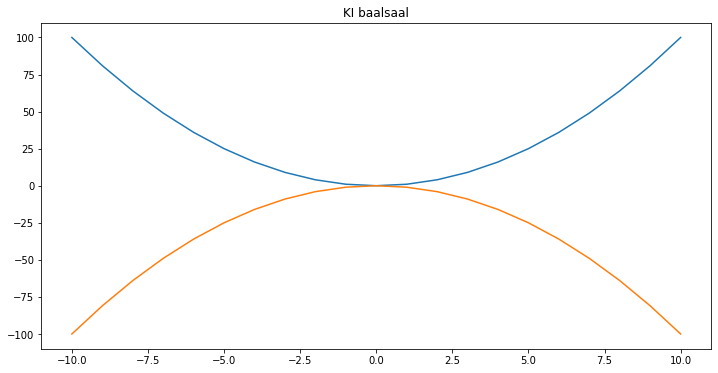

In [278]:
plt.figure(figsize=(12,6))

plt.title("KI baalsaal")

plt.plot(x,x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X squared')

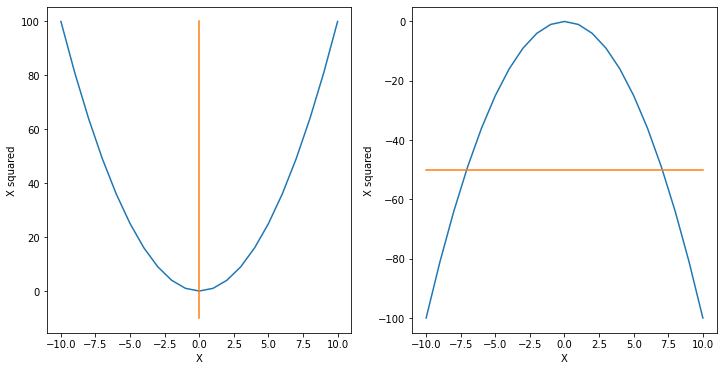

In [279]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1) #row,column,panel selection
plt.plot(x,x**2)
plt.plot([0,0],[-10,100])
plt.xlabel('X')
plt.ylabel('X squared')



plt.subplot(1,2,2)
plt.plot(x,-1*(x**2))
plt.plot([-10,10],[-50,-50])
plt.xlabel('X')
plt.ylabel('X squared')

In [280]:

##bar plot
#plt.bar

# Reading Data SQL,CSVs,APIs

### Read data from SQL database

In [281]:
import sqlite3

In order to work with a SQLite database from Python, we first have to connect to it. We can do that using the connect function, which returns a Connection object.

In [282]:
connect =sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/chinook.db')

Once we have a Connection object, we can then create a Cursor object. Cursors allow us to execute SQL queries against a database

In [283]:
cur =connect.cursor()

The Cursor created has a method execute, which will receive SQL parameters to run against the database.

In [284]:
cur.execute('SELECT * FROM employees;')

 we didn't assign the result of the above query to a variable. This is because we need to run another command to actually fetch the results.

We can use the fetchall method to fetch all of the results of a query:

In [285]:
results = cur.fetchall()

In [286]:
results

[(1,
  'Adams',
  'Andrew',
  'General Manager',
  None,
  '1962-02-18 00:00:00',
  '2002-08-14 00:00:00',
  '11120 Jasper Ave NW',
  'Edmonton',
  'AB',
  'Canada',
  'T5K 2N1',
  '+1 (780) 428-9482',
  '+1 (780) 428-3457',
  'andrew@chinookcorp.com'),
 (2,
  'Edwards',
  'Nancy',
  'Sales Manager',
  1,
  '1958-12-08 00:00:00',
  '2002-05-01 00:00:00',
  '825 8 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 2T3',
  '+1 (403) 262-3443',
  '+1 (403) 262-3322',
  'nancy@chinookcorp.com'),
 (3,
  'Peacock',
  'Jane',
  'Sales Support Agent',
  2,
  '1973-08-29 00:00:00',
  '2002-04-01 00:00:00',
  '1111 6 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5M5',
  '+1 (403) 262-3443',
  '+1 (403) 262-6712',
  'jane@chinookcorp.com'),
 (4,
  'Park',
  'Margaret',
  'Sales Support Agent',
  2,
  '1947-09-19 00:00:00',
  '2003-05-03 00:00:00',
  '683 10 Street SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5G3',
  '+1 (403) 263-4423',
  '+1 (403) 263-4289',
  'margaret@chinookcorp.com'),
 (5,


the results are returned as a list of tuples. Each tuple corresponds to a row in the database that we accessed. Dealing with data this way is painful.

We'd need to manually add column headers, and manually parse the data. Luckily, the pandas library has an easier way, which we'll look at in the next section

In [287]:
sqldf=pd.DataFrame(results)

In [288]:
sqldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


**Using pandas read_sql method**

We can use the pandas read_sql function to read the results of a SQL query directly into a pandas DataFrame.

In [289]:
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/chinook.db')

In [290]:
df = pd.read_sql('SELECT * FROM employees;', conn)
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [291]:
df = pd.read_sql('SELECT * FROM employees;', conn,
                 index_col='EmployeeId',
                 parse_dates=['BirthDate', 'HireDate'])
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


 **Using pandas read_sql_query**

It turns out that the read_sql method we saw above is just a wrapper around read_sql_query and read_sql_table.

In [292]:
df = pd.read_sql_query('SELECT * FROM employees LIMIT 5;', conn)
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [293]:
df = pd.read_sql_query('SELECT * FROM employees;', conn,
                       index_col='EmployeeId',
                       parse_dates=['BirthDate', 'HireDate'])
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


**Using read_sql_table method**

read_sql_table is a useful function, but it works only with SQLAlchemy, a Python SQL Toolkit and Object Relational Mapper.

In [294]:
from sqlalchemy import create_engine

### Reading Excel files

The read_excel method,
 we are choosing the first column, product_id, as index (index=0) by passing zero to the index_col argument.

In [300]:
products = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/products.xlsx',
                         sheet_name='Products',
                         index_col=[0])

In [301]:
products.head()

,price,merchant_id,brand,name
product_id,,,,
AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


**Another approach on reading Excel data is using the ExcelFile class for parsing tabular Excel sheets into DataFrame objects.

This ExcelFile will let us work with sheets easily, and will be faster than the previous read_excel method.**

In [302]:
excel_file = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/products.xlsx')

We can now explore the sheets on that Excel file with sheet_names

In [303]:
excel_file.sheet_names

['Products', 'Descriptions', 'Merchants']

 parse specified sheet(s) into a Pandas' DataFrame using ExcelFile's parse() method.

Everytime we call parse() method, we'll need to pass an explicit sheet_name parameter indicating which sheet from the Excel file we want to be parsed. First sheet will be parsed by default.

In [304]:
products = excel_file.parse('Products')

In [305]:
products

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...
...,...,...,...,...,...
1240,AVphFybdLJeJML43Wnza,64.95,1110,JBL,"JBL - 6 x 9"" 3-Way Car Speakers with Polypropy..."
1241,AVpe_qIa1cnluZ0-bjrN,871.06,1002,HP,HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...
1242,AVphibxI1cnluZ0-DpxG,74.95,1238,Magellan,Magellan Roadmate 5322-LM 5 Touchscreen Portab...
1243,AVpgrtW3ilAPnD_xv67M,294.35,1239,Pyle Pro,PMX840BT Bluetooth 8-Channel 800-Watt Powered ...


In [306]:
products.dtypes

product_id      object
price          float64
merchant_id      int64
brand           object
name            object
dtype: object

In [308]:
merchants = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/products.xlsx',
                          sheet_name='Merchants',
                          index_col='merchant_id')
merchants

,merchant
merchant_id,
1001,Bestbuy.com
1002,Walmart.com
1003,Bestbuy.com
1004,Growkart
1005,bhphotovideo.com
...,...
1236,PRIMESELLER
1237,Spy Tec
1238,Action Gear


In [318]:
merchants = excel_file.parse('Merchants',
                             index_col='merchant_id')
merchants.head()

,merchant
merchant_id,
1001,Bestbuy.com
1002,Walmart.com
1003,Bestbuy.com
1004,Growkart
1005,bhphotovideo.com


**Saving to Excel file
to_excel()**

In [310]:
products.to_excel('out.xlsx')

pd.read_excel('out.xlsx').head()

,Unnamed: 0,product_id,price,merchant_id,brand,name
0,0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


Suppose we wanted to insert the our data into the spreadsheet file in a position somewhere other than the top-left corner.

We can shift where the to_excel method writes the data by using startrow to set the cell after which the first row will be printed, and startcol to set which cell after which the first column will be printed.

In [311]:
products.to_excel('out.xlsx',
                  sheet_name='Products',
                  startrow=1,
                  startcol=2)

In [312]:
pd.read_excel('out.xlsx').head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,product_id,price,merchant_id,brand,name
1,NaN,NaN,0.0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
2,NaN,NaN,1.0,AVpgMuGwLJeJML43KY_c,69,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
3,NaN,NaN,2.0,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
4,NaN,NaN,3.0,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...


Saving multiple sheets
If we wanted to write a single DataFrame to a single sheet with default formatting then we are done. However, if we want to write multiple sheets and/or multiple DataFrames, then we will need to create an ExcelWriter object.

In [313]:
writer = pd.ExcelWriter('out.xlsx')
writer

In [314]:
with writer:
    products.to_excel(writer, sheet_name='Products')

In [316]:
pd.read_excel('out.xlsx', sheet_name='Products').head()

,Unnamed: 0,product_id,price,merchant_id,brand,name
0,0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [321]:
# with writer:
#   merchants.to_excel(writer, sheet_name='Merchants')

In [322]:
with pd.ExcelWriter('out.xlsx') as writer:
    products.to_excel(writer, sheet_name='Products')
    merchants.to_excel(writer, sheet_name='Merchants')

In [323]:
pd.read_excel('out.xlsx', sheet_name='Merchants').head()

,merchant_id,merchant
0,1001,Bestbuy.com
1,1002,Walmart.com
2,1003,Bestbuy.com
3,1004,Growkart
4,1005,bhphotovideo.com


#Random stuff

**List**

In [326]:
l = [2,3,4,'hello',True]

In [327]:
l

[2, 3, 4, 'hello', True]

**Tuple**

Same as a list but immutable. list [ ] diye hoy.
but tuple ( ) diye hoy

In [328]:
t= (3,4,5, 'hello', True)

In [329]:
t

(3, 4, 5, 'hello', True)

**Dictionary**
{ } diye create hoy

In [324]:
user ={
    'name'  : "Shaqran Bin Saleh",
    'email' : "shaqran39@gmail.com",
    'age'   : 24,
    'subscribed': True

}

In [325]:
user

{'age': '24',
 'email': 'shaqran39@gmail.com',
 'name': 'Shaqran Bin Saleh',
 'subscribed': True}

In [330]:
user['email']

'shaqran39@gmail.com'

**Sets**
unorder collection which the unique characteristic that they only contain unique elements

**Sets { } diye hoy**

In [333]:
s = {3,2,4,3, 2,6,21,34}

In [334]:
s

{2, 3, 4, 6, 21, 34}

**Iterating elements**

In [335]:
l

[2, 3, 4, 'hello', True]

In [336]:
for elem in l:
  print(elem)

2
3
4
hello
True


In [337]:
user

{'age': '24',
 'email': 'shaqran39@gmail.com',
 'name': 'Shaqran Bin Saleh',
 'subscribed': True}

Dictionary thakle elem er jaigay key use korbo

In [340]:
for key in user:
  print(key.title(), '=>', user[key] )

Name => Shaqran Bin Saleh
Email => shaqran39@gmail.com
Age => 24
Subscribed => True


In [341]:
for value in user.values():
  print(value)

Shaqran Bin Saleh
shaqran39@gmail.com
24
True
